In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = r'/content/drive/MyDrive/GP/Number_hand_ges/train'
validation_path = r'/content/drive/MyDrive/GP/Number_hand_ges/validate'

trdate = ImageDataGenerator(rescale=1./255)
train_batches = trdate.flow_from_directory(directory=train_path, target_size=(224, 224), class_mode='categorical', batch_size=100, shuffle=True)

vddata = ImageDataGenerator(rescale=1./255)
validation_batches = vddata.flow_from_directory(directory=validation_path, target_size=(224, 224), class_mode='categorical', batch_size=10, shuffle=True)

Found 2581 images belonging to 11 classes.
Found 175 images belonging to 11 classes.


In [ ]:
train_batches.image_shape

(224, 224, 3)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Functional

In [ ]:
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense, Dropout
from tensorflow.keras.models import Model

for layer in vgg_model.layers[:15]:
    layer.trainable = False
 
for layer in vgg_model.layers[15:]:
    layer.trainable = True

last_output = vgg_model.get_layer('block5_pool').output

x = GlobalMaxPooling2D()(last_output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(11, activation='softmax')(x)

model = Model(vgg_model.input, x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import categorical_crossentropy

model.compile(optimizer=SGD(lr=0.001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras import regularizer

regularizer = regularizers.L2(2.)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', save_freq='epoch')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)

call_backs = [checkpoint, early_stop, reduce_lr]

In [ ]:
import time, psutil
uptime = time.time() - psutil.boot_time()
remain = 12*60*60 - uptime
print(remain/3600)

11.815608011086782


In [ ]:
history = model.fit(
   train_batches,
   epochs = 10,
   validation_data=validation_batches,
   callbacks=call_backs)

Epoch 1/10
26/26 [==============================] - 1358s 51s/step - loss: 2.3724 - accuracy: 0.2001 - val_loss: 1.2728 - val_accuracy: 0.4800

Epoch 00001: loss improved from inf to 2.06971, saving model to best_model.hdf5
Epoch 2/10
26/26 [==============================] - 1279s 49s/step - loss: 1.1172 - accuracy: 0.5942 - val_loss: 0.3528 - val_accuracy: 0.8857

Epoch 00002: loss improved from 2.06971 to 0.86087, saving model to best_model.hdf5
Epoch 3/10
26/26 [==============================] - 1304s 50s/step - loss: 0.4360 - accuracy: 0.8316 - val_loss: 0.2897 - val_accuracy: 0.9429

Epoch 00003: loss improved from 0.86087 to 0.42654, saving model to best_model.hdf5
Epoch 4/10
26/26 [==============================] - 1318s 51s/step - loss: 0.2449 - accuracy: 0.9181 - val_loss: 0.1508 - val_accuracy: 0.9657

Epoch 00004: loss improved from 0.42654 to 0.23644, saving model to best_model.hdf5
Epoch 5/10
26/26 [==============================] - 1289s 50s/step - loss: 0.1781 - accuracy

In [ ]:
history.history

{'accuracy': [0.27198758721351624,
  0.6807438731193542,
  0.8399844765663147,
  0.9283223748207092,
  0.9531189203262329,
  0.9585431814193726,
  0.9810150861740112,
  0.9910887479782104,
  0.9949631690979004,
  0.9949631690979004],
 'loss': [2.0697109699249268,
  0.860866904258728,
  0.42654281854629517,
  0.23643550276756287,
  0.15840518474578857,
  0.12793311476707458,
  0.08318311721086502,
  0.049184463918209076,
  0.035268351435661316,
  0.03127775713801384],
 'lr': [0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.0005,
  0.0005,
  0.0005],
 'val_accuracy': [0.47999998927116394,
  0.8857142925262451,
  0.9428571462631226,
  0.9657142758369446,
  0.9714285731315613,
  0.9714285731315613,
  0.9714285731315613,
  0.9885714054107666,
  0.9828571677207947,
  0.9885714054107666],
 'val_loss': [1.2728136777877808,
  0.3527945578098297,
  0.28965672850608826,
  0.15083399415016174,
  0.137694850564003,
  0.1192224994301796,
  0.1693907082080841,
  0.05999064818024635,


In [ ]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
imgs, labels = next(validation_batches) 
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

loss of 0.007314283400774002; accuracy of 100.0%


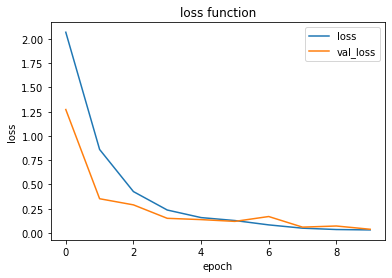

In [ ]:
# plot loss per epoch:

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('loss function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

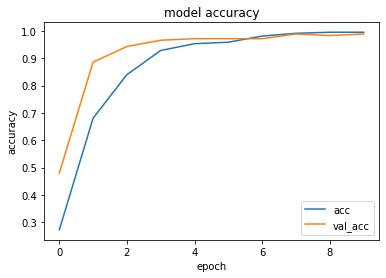

In [ ]:
# plot accuracy per epoch:

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

predictions on a small set of test data…

Five             nothing             nine             Seven             nothing             eight             Four             One             One             Six             

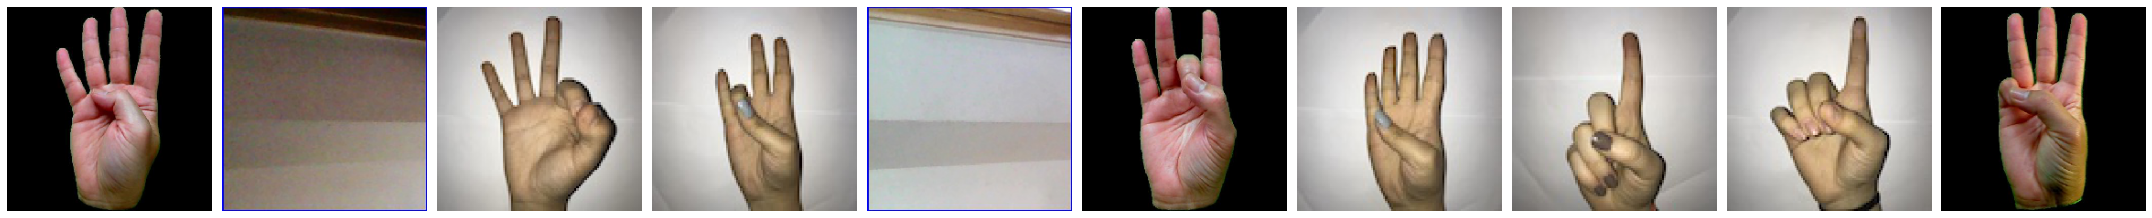

Actual labels
Five             nothing             nine             Seven             nothing             eight             Four             One             One             Six             

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


word_dict = {0:'Zero', 1:'One', 2:'Two', 3:'Three', 4:'Four', 5: 'Five', 6: 'Six', 7: 'Seven', 8: 'eight', 9: 'nine', 10: 'nothing'}
print("predictions on a small set of test data…")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='             ')
plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='             ')

In [ ]:
model.save('NumberModel_adam.h5')

In [ ]:
from google.colab import files
files.download('NumberModel_adam.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf

model_lite = tf.keras.models.load_model('/content/NumberModel_adam.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("NumberModel_adam.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp8ag5fqp3/assets


INFO:tensorflow:Assets written to: /tmp/tmp8ag5fqp3/assets


59940996

In [ ]:
from google.colab import files
files.download('NumberModel_adam.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>